# 実践演習5-3

Scikit learn の GaussianNBとLogisticRegression でirisデータを識別します。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## データの読み込み

irisデータを読み込み、パターン行列をX, 正解ラベルベクトルをyとします。

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

## データの可視化

主成分分析を行って2次元データに変換し、散布図で表示します。

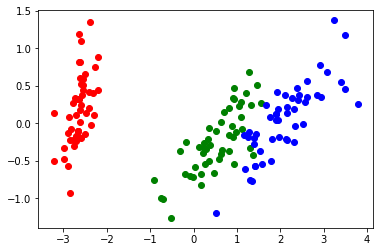

In [3]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"go")
plt.plot(X2[y==2,0], X2[y==2,1],"bo")

## ナイーブベイズ

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

In [4]:
clf1 = GaussianNB()
clf1.fit(X, y)

GaussianNB(priors=None)

In [5]:
scores = cross_val_score(clf1, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

95.33 +/- 4.27 %


### 学習結果の表示

平均(theta)と分散(sigma)を表示します。

In [6]:
clf1.theta_

array([[5.006, 3.418, 1.464, 0.244],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [7]:
clf1.sigma_

array([[0.121764, 0.142276, 0.029504, 0.011264],
       [0.261104, 0.0965  , 0.2164  , 0.038324],
       [0.396256, 0.101924, 0.298496, 0.073924]])

### ロジスティック識別

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

In [8]:
clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
scores = cross_val_score(clf2, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

95.33 +/- 6.00 %


### 学習結果の表示

重み(coef)と切片(intercept)を表示します。

In [10]:
clf2.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

In [11]:
clf2.intercept_

array([ 0.26560617,  1.08542374, -1.21471458])

### この演習問題で得られた知見